# Análise gráfica Wind Osório 2019

## Preparando ambiente

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

In [21]:
sns.set(rc={'figure.figsize':(15, 9)})

## Carregando os dados

In [3]:
wind = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/dias-tipicos/main/data/wind_osorio_2019.csv', header=3)
wind.sample(5)

,time,local_time,electricity,wind_speed
4518,2019-07-08 06:00,2019-07-08 03:00,0.010,2.254
6885,2019-10-14 21:00,2019-10-14 18:00,0.122,4.796
1939,2019-03-22 19:00,2019-03-22 16:00,0.070,3.964
7382,2019-11-04 14:00,2019-11-04 12:00,0.056,3.684
2719,2019-04-24 07:00,2019-04-24 04:00,0.033,3.108


In [4]:
wind.dtypes

time            object
local_time      object
electricity    float64
wind_speed     float64
dtype: object

In [5]:
del wind['time']
wind['local_time'] = pd.to_datetime(wind['local_time'])
print(wind.dtypes)
wind.sample(5)

local_time     datetime64[ns]
electricity           float64
wind_speed            float64
dtype: object


,local_time,electricity,wind_speed
6559,2019-10-01 04:00:00,0.101,4.502
6991,2019-10-19 04:00:00,0.044,3.415
6724,2019-10-08 01:00:00,0.008,2.066
3146,2019-05-11 23:00:00,0.012,2.345
798,2019-02-03 04:00:00,0.046,3.449


In [20]:
wind.describe()

,electricity,wind_speed,wind_aumento,wind_aceleracao,wind_crescimento
count,8760.000000,8760.000000,8759.000000,8758.000000,8759.000000
mean,0.045102,2.959410,0.000076,0.000029,0.013426
std,0.057988,1.302484,0.288229,0.260366,0.261003
min,0.000000,-0.140000,-2.033000,-2.591000,-2.850000
25%,0.006000,1.982000,-0.157000,-0.109000,-0.050000
50%,0.023000,2.792000,-0.006000,-0.006000,0.000000
75%,0.064000,3.856000,0.151000,0.103000,0.050000
max,0.657000,9.234000,2.640000,2.869000,16.800000


## Visualizando a time series

### `wind_sped`

Criando as variáveis de análise (aumento, aceleração e crescimento)

In [27]:
wind['wind_aumento'] = wind[['wind_speed']].diff()
wind['wind_aceleracao'] = wind['wind_aumento'].diff()
wind['wind_media_movel_dia'] = wind['wind_speed'].rolling(24).mean()
wind['wind_media_movel_semana'] = wind['wind_speed'].rolling(24 * 7).mean()

crescimento = np.array([np.NaN])
for index in range(1, len(wind.wind_speed)):
    c = round(((wind.wind_speed[index] / wind.wind_speed[index - 1]) - 1), 2)
    crescimento = np.append(crescimento, c)
wind['wind_crescimento'] = crescimento

Plotando a relação de cada uma das variáveis com o tempo na mesma figura para comparação.

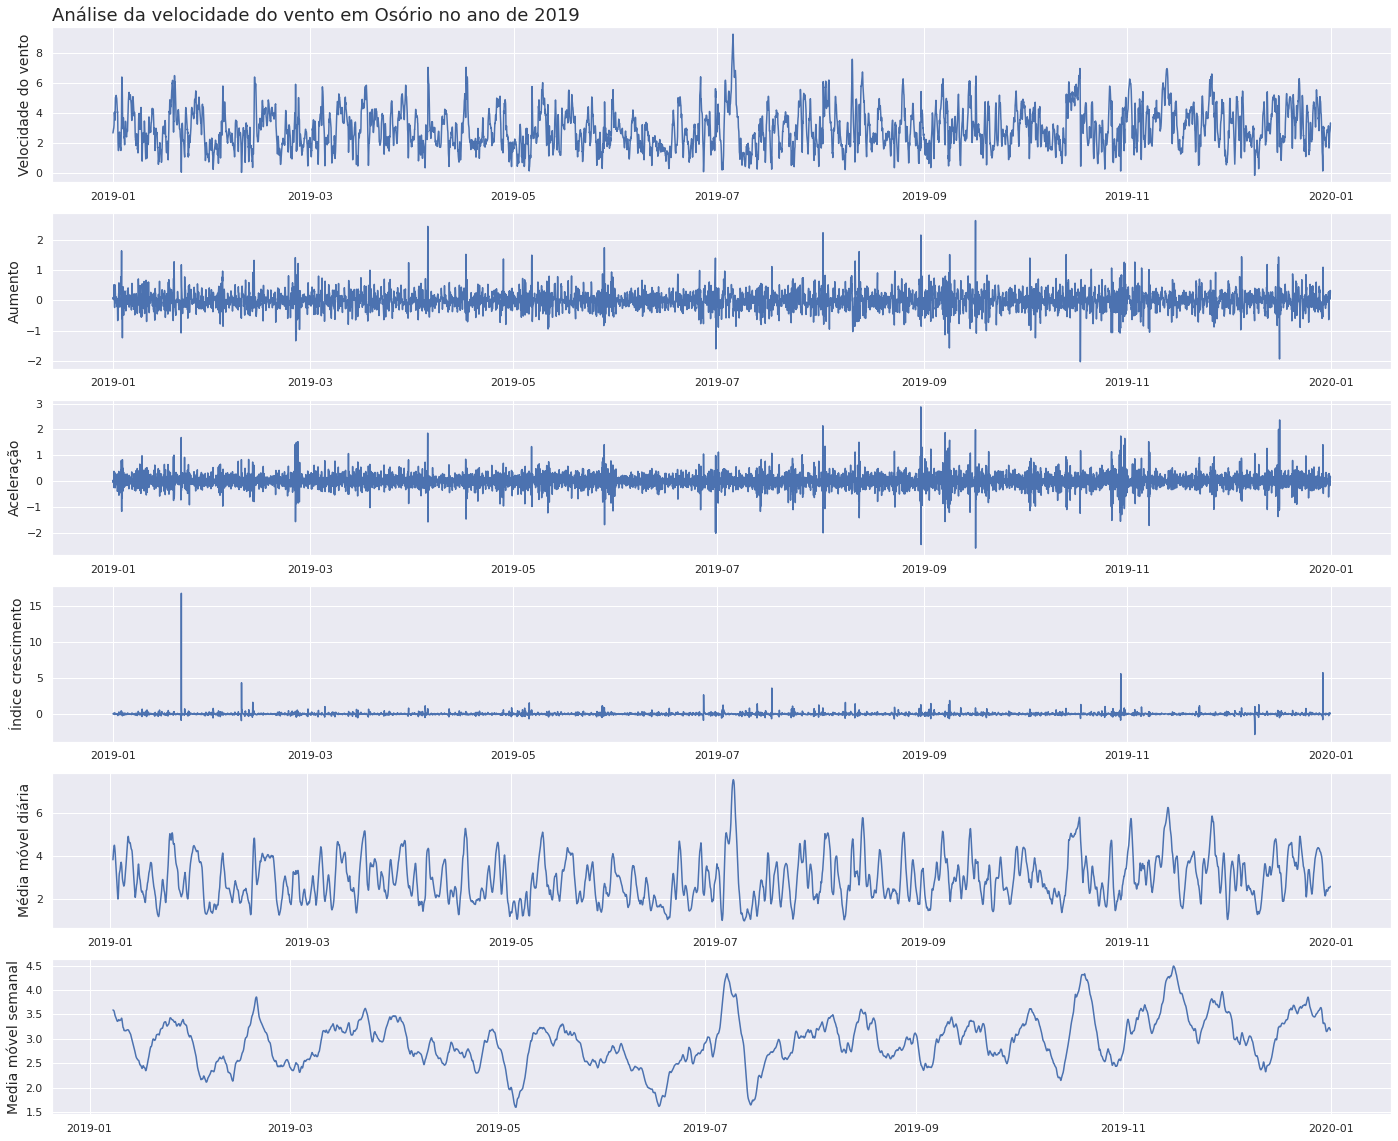

In [28]:
plt.figure(figsize=(24,20))

ax = plt.subplot(6,1,1)
ax.set_title('Análise da velocidade do vento em Osório no ano de 2019',fontsize=18, loc='left')
lp_velocidade = sns.lineplot(x='local_time', y='wind_speed', data=wind)
lp_velocidade.set_xlabel('')
lp_velocidade.set_ylabel('Velocidade do vento', fontsize=14);

plt.subplot(6,1,2)
lp_aumento = sns.lineplot(x='local_time', y='wind_aumento', data=wind)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(6,1,3)
lp_aceleracao = sns.lineplot(x='local_time', y='wind_aceleracao', data=wind)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(6,1,4)
lp_crescimento = sns.lineplot(x='local_time', y='wind_crescimento', data=wind)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Índice crescimento', fontsize=14);

plt.subplot(6,1,5)
lp_crescimento = sns.lineplot(x='local_time', y='wind_media_movel_dia', data=wind)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Média móvel diária', fontsize=14);

plt.subplot(6,1,6)
lp_crescimento = sns.lineplot(x='local_time', y='wind_media_movel_semana', data=wind)
lp_crescimento.set_xlabel('')
lp_crescimento.set_ylabel('Media móvel semanal', fontsize=14);

### `electricity`

Não será necessária a análise do aumento, crescimento e aceleração visto que a correlação entre os dois dados para esse dataset é acima de 0.9

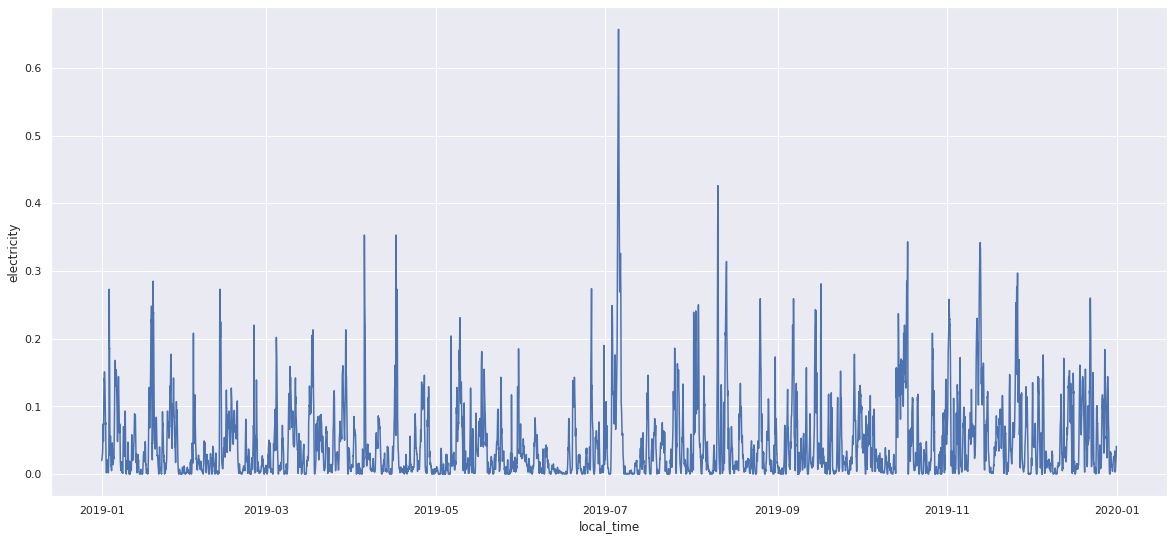

In [11]:
sns.lineplot(x="local_time", y="electricity", data=wind);

## Análise correlação

In [12]:
wind.corr()

,electricity,wind_speed
electricity,1.000000,0.909834
wind_speed,0.909834,1.000000


É notável que `electricity` e `wind_speed` possuem uma alta correlação.

## Autocorrelação `wind_speed`

In [29]:
wind.columns

Index(['local_time', 'electricity', 'wind_speed', 'wind_aumento',
       'wind_aceleracao', 'wind_crescimento', 'wind_media_movel_dia',
       'wind_media_movel_semana'],
      dtype='object')

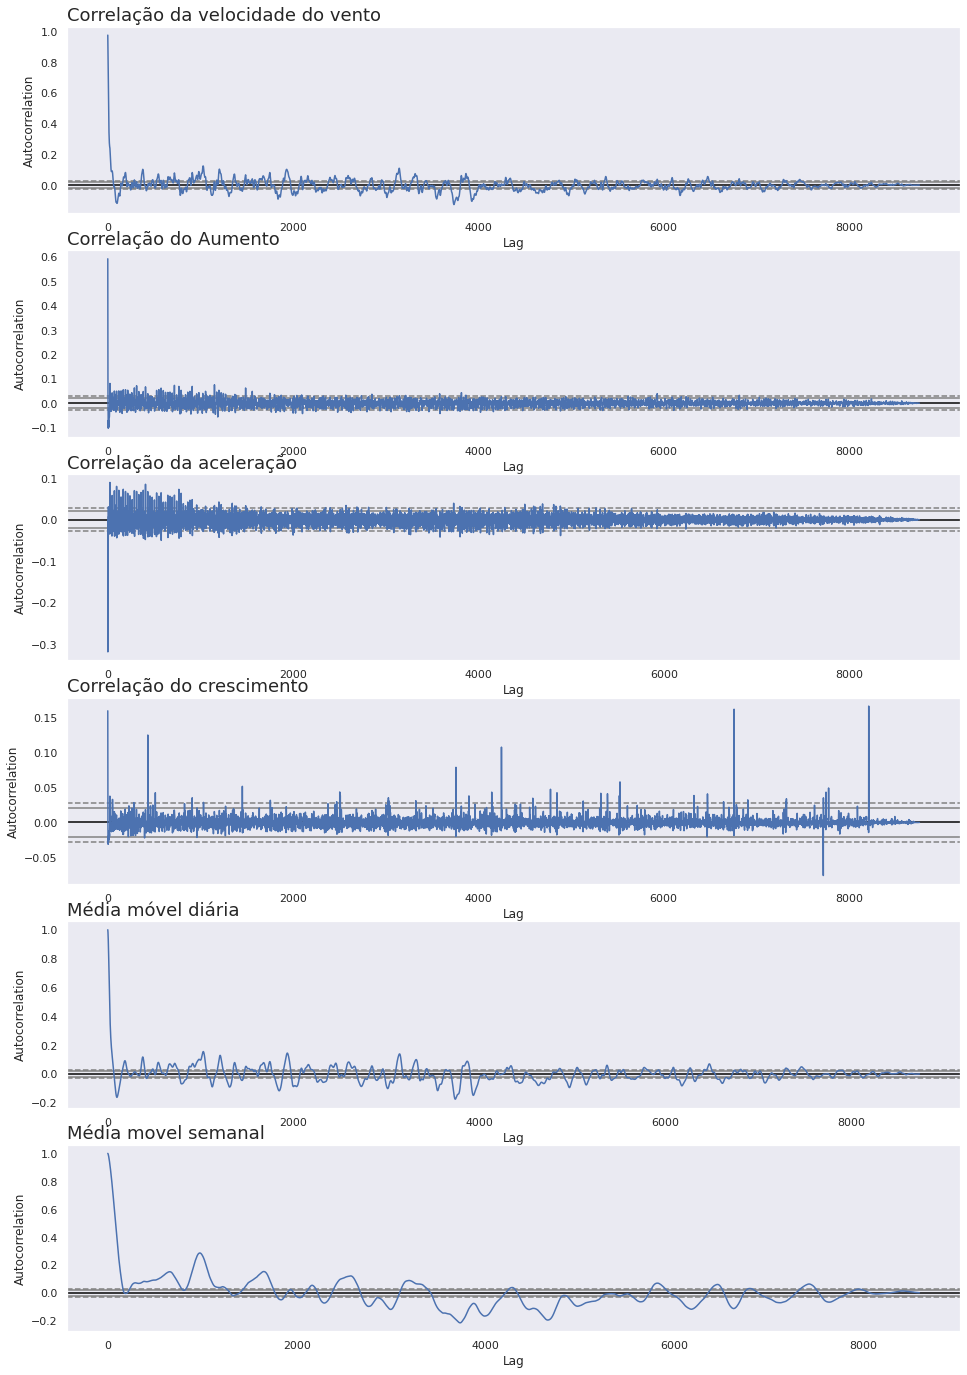

In [34]:
plt.figure(figsize=(16,24))

ac_vento = plt.subplot(6,1,1)
autocorrelation_plot(wind['wind_speed'], ax = ac_vento);
ac_vento.set_title('Correlação da velocidade do vento', fontsize = 18, loc='left')


ac_aumento = plt.subplot(6,1,2)
autocorrelation_plot(wind['wind_aumento'][1:], ax = ac_aumento);
ac_aumento.set_title('Correlação do Aumento', fontsize = 18, loc='left')


ac_aceleracao = plt.subplot(6,1,3)
autocorrelation_plot(wind['wind_aceleracao'][2:], ax = ac_aceleracao);
ac_aceleracao.set_title('Correlação da aceleração', fontsize = 18, loc='left')


ac_cresc = plt.subplot(6,1,4)
autocorrelation_plot(wind['wind_crescimento'][1:], ax = ac_cresc);
ac_cresc.set_title('Correlação do crescimento', fontsize = 18, loc='left');

ac_mm_dia = plt.subplot(6,1,5)
autocorrelation_plot(wind['wind_media_movel_dia'][24:], ax = ac_mm_dia);
ac_mm_dia.set_title('Média móvel diária', fontsize = 18, loc='left');

ac_mm_semana = plt.subplot(6,1,6)
autocorrelation_plot(wind['wind_media_movel_semana'][(24 * 7):], ax = ac_mm_semana);
ac_mm_semana.set_title('Média movel semanal', fontsize = 18, loc='left');
